In [242]:
import pandas as pd

# Read raw dataset
rd = pd.read_csv("data/camp1_readings.csv")
#print(rd.head(1))

In [243]:
# Convert unix timestamp to date

rd['date'] = pd.to_datetime(rd['ts'],unit='s')
# print(rd['date'])

In [244]:
# temperature = tmpX / 16

rd['tmp1'] = rd['tmp1'] / 16
rd['tmp2'] = rd['tmp2'] / 16
rd['tmp3'] = rd['tmp3'] / 16

#print(rd.head(1))

In [245]:
# split day and hour

rd['day'] = [d.date() for d in rd['date']]
rd['hour'] = [d.time() for d in rd['date']]
#rd.day.unique()
#rd.day.value_counts().head()

In [261]:
import datetime

day_one = rd.loc[rd.day == datetime.date(2018, 12, 13)]
day_two = rd.loc[rd.day == datetime.date(2018, 12, 14)]
#day_one.device_id.value_counts().head()

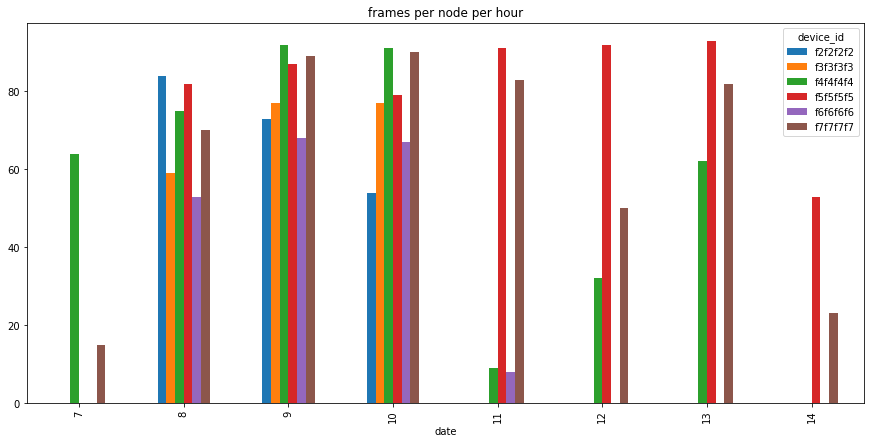

In [263]:
import matplotlib.pyplot as plt

t1 = pd.DatetimeIndex(day_one.date)
fig, ax = plt.subplots(figsize=(15,7))

day_one.groupby([t1.hour, 'device_id']).count()['ts'].unstack().plot.bar(ax=ax, title="D1 - frames per node per hour")

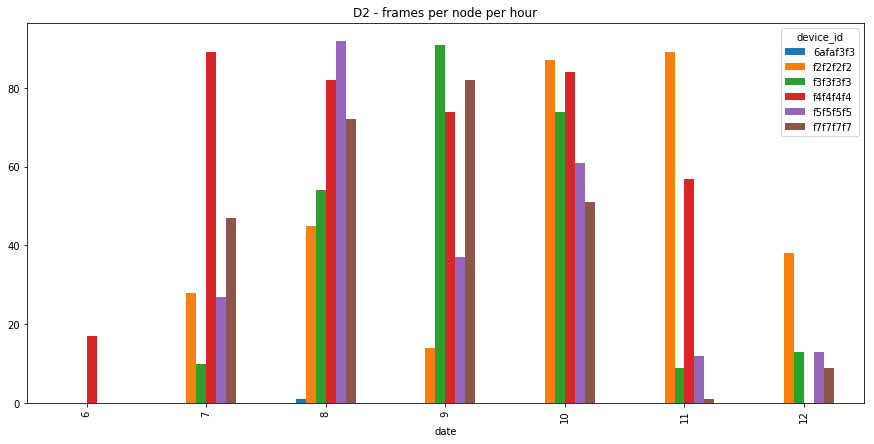

In [264]:
t2 = pd.DatetimeIndex(day_two.date)
fig, ax = plt.subplots(figsize=(15,7))

day_two.groupby([t2.hour, 'device_id']).count()['ts'].unstack().plot.bar(ax=ax, title="D2 - frames per node per hour")